# <div style="color:white;display:fill;border-radius:5px;background-color:#0E2031;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Content</p></div>     
   
- Libraries
- Configurations
- **Exploratory Data Analysis** 
    - Hypothesis
    - Mind Map Business
    - Summary Table
    - Bivariate Analysis
        - About Cancelations
            - Cancelations by Hotel
            - Cancelations by Month
            - Cancelations by Lead Time
            - Cancelations by Country
            - Cancelations by Market Segment
            - Cancelations by Agency
            - Cancelations by Company
            - Cancelations by Deposit Type
        - About ADR

## <div style="color:white;display:fill;border-radius:5px;background-color:#153656;letter-spacing:0.5px;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Libraries</p></div>

In [1]:
#!pip install sort-dataframeby-monthorweek
#!pip install sorted-months-weekdays
#!pip install calplot

In [2]:
# Visualization Tools
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from IPython.display import display

#Ordering by Month instead of alphabetical order
import sort_dataframeby_monthorweek as sd

#import calplot

In [3]:
%run part01_preprocessing.ipynb

Last updated: 2023-04-23T23:00:40.567020-03:00

Python implementation: CPython
Python version       : 3.10.6
IPython version      : 8.5.0

Compiler    : GCC 11.3.0
OS          : Linux
Release     : 5.19.0-40-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 12
Architecture: 64bit

/home/alysson/projects/Hotel-Booking-Cancelations/data/data_processed/hotel_bookings_processed.csv
/home/alysson/projects/Hotel-Booking-Cancelations/data/data_raw/hotel_bookings.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              11

In [4]:
def plot_settings():   
    
    #plt.style.use('seaborn-whitegrid')
    # Set Matplotlib defaults
    #plt.rc('figure', autolayout=True)
    #plt.rc('axes', labelweight='bold', labelsize='large', titleweight='bold', titlesize=14, titlepad=10)
    plt.rc('animation', html='html5')
    rcParams['axes.spines.top'] = False
    rcParams['axes.spines.right'] = False
    
    #%config InlineBackend.figure_format='retina'
    sns.set(style='whitegrid', font_scale=1.2)#palette='muted', 
    #HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]
    #sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
    
plot_settings()

In [5]:
# Função para ordenar a coluna por mes
def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

In [6]:
def summary_stats(df):
    numerical_features = df.select_dtypes(include = 'number').columns.values
    df = df[numerical_features]
    
    count_ = pd.DataFrame(df.apply(np.size))
    pct_ = pd.DataFrame(df.apply(np.size)/len(data_raw)*100)
    sum_ = pd.DataFrame(df.apply(np.sum))
    mean_ = pd.DataFrame(df.apply(np.mean))
    std_ = pd.DataFrame(df.apply(np.std))
    median_ = pd.DataFrame(df.apply(np.median))
    
    min_ = pd.DataFrame(df.apply(min))
    max_ = pd.DataFrame(df.apply(max))
    range_ = pd.DataFrame(df.apply(lambda x: x.max() - x.min()))
    q1_ = pd.DataFrame(df.apply(lambda x: np.percentile(x,25)))
    q3_ = pd.DataFrame(df.apply(lambda x: np.percentile(x,75)))
    
    #skewness_= pd.DataFrame(df.apply(lambda x: x.skew()))
    #kurtosis_ = pd.DataFrame(df.apply(lambda x: x.kurtosis()))
    
    summary = pd.concat([count_, pct_, mean_, std_, median_, sum_, min_, max_, range_, q1_,q3_],axis=1)
    summary.columns = ['counts', 'pct_raw','mean','std','median','sum','min','max', 'range', '25%','75%']
 

    cm = sns.light_palette("#2D7DAB", as_cmap = True)
    
    display(summary.style.format('{:.2f}').background_gradient(subset=(summary.index[3:],summary.columns[:]),cmap=cm))

# <div style="color:white;display:fill;border-radius:5px;background-color:#0E2031;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Exploratory Data Analysis</p></div> 

In exploratory data analysis we must analyze as much as we can, literally doing detective work. However, our objective specifically in this project is about cancellation, so the analysis will be focused on that.

### <div style="color:white;display:fill;border-radius:5px;background-color:#2E6B8E;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Hypothesis</p></div> 

**Hypothesis about cancellations**

Some hypotheses were raised in meetings previously scheduled by the business team and data scientists, among the most interesting are:

- H1: The difference between cancellation rate of urban and resort hotels is greater than 5%.
- H2: The cancellations rate during low season is higher than high season.
- H3: People with lead time of more than 10 days cancel more than people with lead time of less than 10 days.
- H4: People who requires at least one special requests cancel less.
- H5: People who have a previous cancellation history cancel more.
- H8: The difference in cancellations rate between the top 10 agencies with the most bookings is less than 10%.
- H14: The adr at the Resort Hotel is higher than at the City Hotel throughout the year

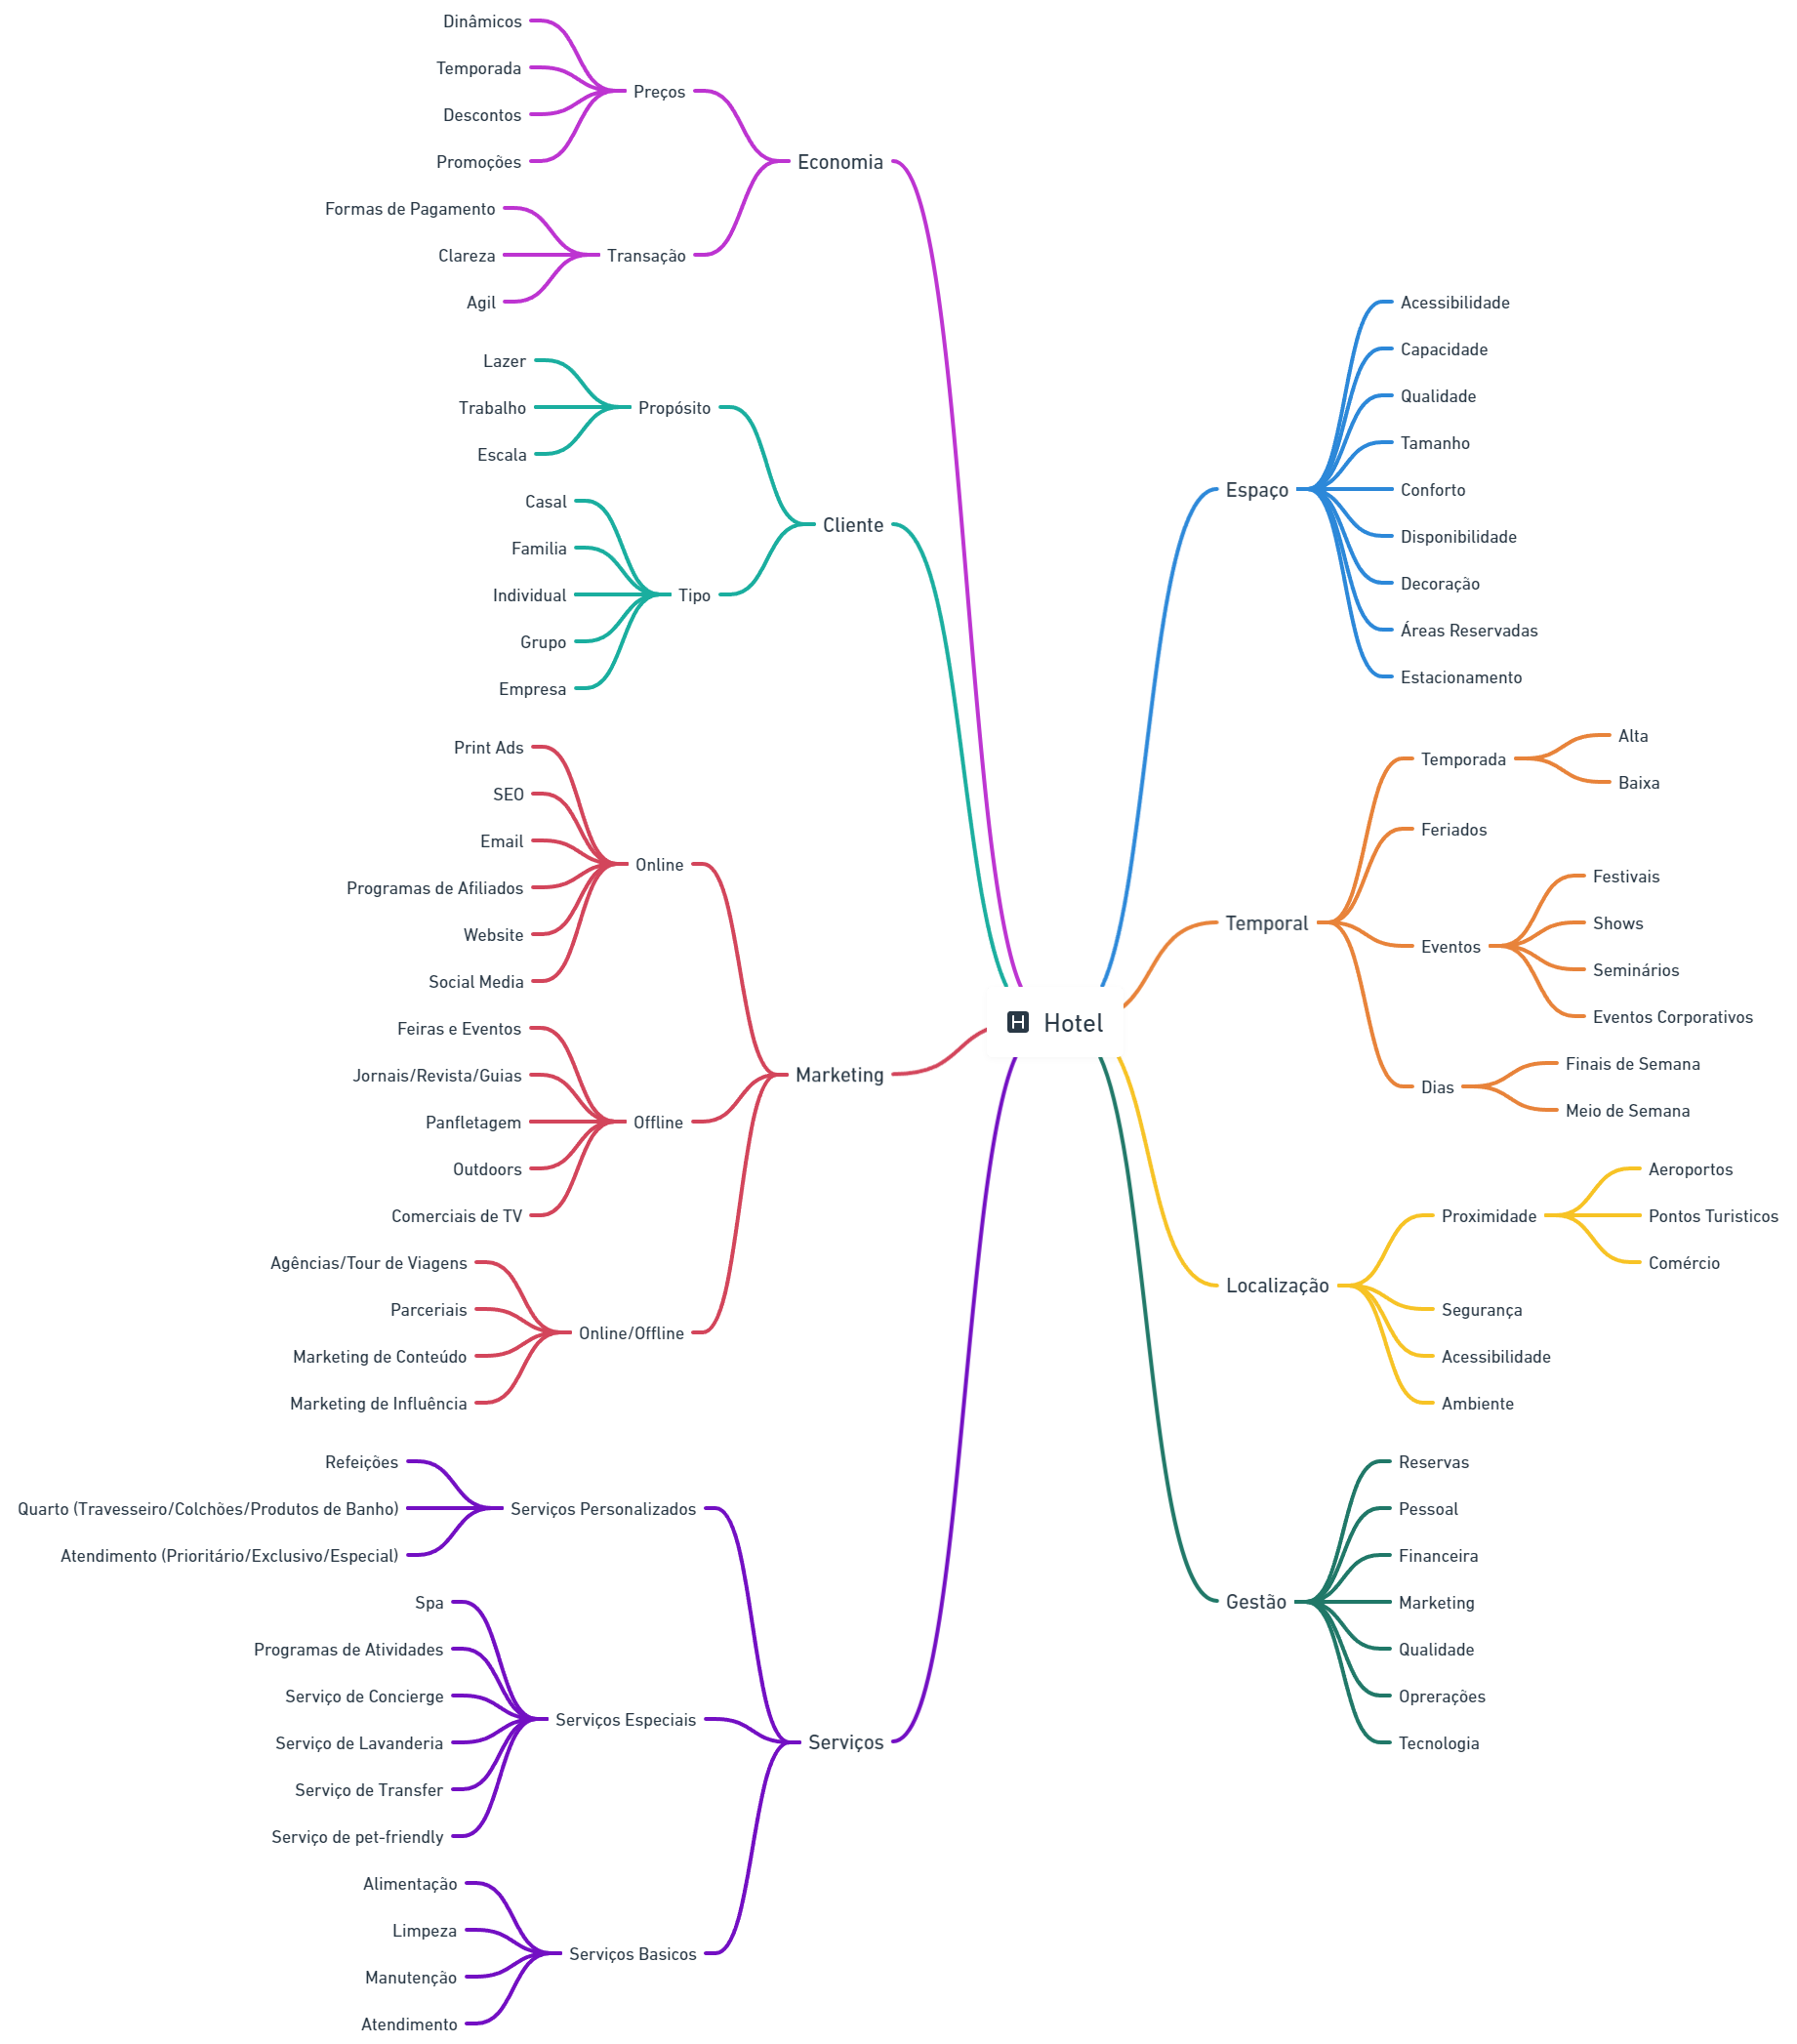

In [7]:
img = Image.open(f'{ROOT_DIR}/images/mind_map.png')
img

### <div style="color:white;display:fill;border-radius:5px;background-color:#2E6B8E;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Summary Table</p></div>

In [8]:
rh = data.loc[(data["hotel"] == "Resort Hotel")]
ch = data.loc[(data["hotel"] == "City Hotel")]

In [9]:
summary_stats(data)

,counts,pct_raw,mean,std,median,sum,min,max,range,25%,75%
is_canceled,119234.00,99.87,0.37,0.48,0.00,44224.00,0.00,1.00,1.00,0.00,1.00
lead_time,119234.00,99.87,104.10,106.88,69.00,12412632.00,0.00,737.00,737.00,18.00,161.00
arrival_date_year,119234.00,99.87,2016.16,0.71,2016.00,240394406.00,2015.00,2017.00,2.00,2016.00,2017.00
arrival_date_week_number,119234.00,99.87,27.16,13.60,28.00,3238774.00,1.00,53.00,52.00,16.00,38.00
arrival_date_day_of_month,119234.00,99.87,15.80,8.78,16.00,1883638.00,1.00,31.00,30.00,8.00,23.00
stays_in_weekend_nights,119234.00,99.87,0.93,1.00,1.00,110530.00,0.00,19.00,19.00,0.00,2.00
stays_in_week_nights,119234.00,99.87,2.50,1.90,2.00,297969.00,0.00,50.00,50.00,1.00,3.00
adults,119234.00,99.87,1.86,0.58,2.00,221634.00,0.00,55.00,55.00,2.00,2.00
children,119234.00,99.87,0.10,0.40,0.00,12403.00,0.00,10.00,10.00,0.00,0.00
babies,119234.00,99.87,0.01,0.10,0.00,949.00,0.00,10.00,10.00,0.00,0.00


In [10]:
data.describe(include="object").T

,count,unique,top,freq
hotel,119234,2,City Hotel,79186
arrival_date_month,119234,12,August,13863
meal,119234,4,BB,92239
country,119234,178,PRT,48496
market_segment,119234,8,Online TA,56412
distribution_channel,119234,5,TA/TO,97766
reserved_room_type,119234,10,A,85877
assigned_room_type,119234,12,A,74025
deposit_type,119234,3,No Deposit,104485
customer_type,119234,4,Transient,89496


**Check**
- negative adr? adr lower than zero?adr equal to 5400?
- zero people?
- reservations with 10 babies/children
- Waiting list of 391 dias?

### <div style="color:white;display:fill;border-radius:5px;background-color:#2E6B8E;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">About Cancelations</p></div>

### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Cancelations by Hotel</p></div>

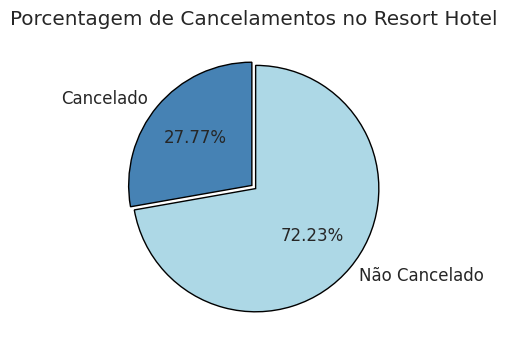

In [11]:
plt.figure(figsize=(4,4))
plt.title('Porcentagem de Cancelamentos no Resort Hotel');
plt.pie([len(data.loc[(data.is_canceled == 1) & (data.hotel == 'Resort Hotel')]),
         len(data.loc[(data.is_canceled == 0) & (data.hotel == 'Resort Hotel')])],  
               
        labels = ['Cancelado', 'Não Cancelado'],
        colors=['#4682B4','#ADD8E6'],
        explode = (0.02, 0.02),
        startangle=90,
        autopct='%.2f%%',
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : "black"}, textprops={'fontsize': 12});

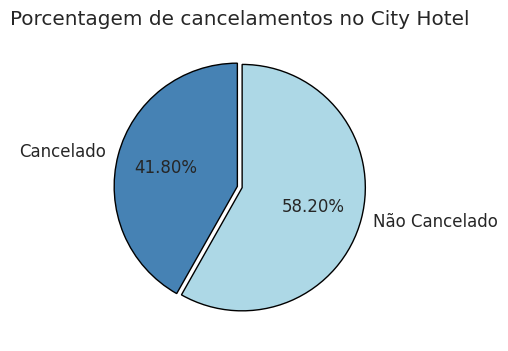

In [12]:
plt.figure(figsize=(4,4))
plt.title('Porcentagem de cancelamentos no City Hotel');
plt.pie([len(data.loc[(data.is_canceled == 1) & (data.hotel == 'City Hotel')]),
         len(data.loc[(data.is_canceled == 0) & (data.hotel == 'City Hotel')])],  
               
        labels = ['Cancelado', 'Não Cancelado'],
        colors=['#4682B4','#ADD8E6'],
        explode = (0.02, 0.02),
        startangle=90,
        autopct='%.2f%%',
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : "black"}, textprops={'fontsize': 12});

**H1:** True, the cancellation rate of the City Hotel is 14% higher than the Resort Hotel.

### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Cancelations by Month</p></div>

In [13]:
monthly_cancelations = data.groupby(['arrival_date_month','hotel']).agg( reservations = ('hotel', 'size'),
                                                                         #adr_mean = ('adr', 'mean'),                            
                                                                         canceled_mean = ('is_canceled', 'mean')).reset_index()

monthly_cancelations = sort_month(monthly_cancelations, 'arrival_date_month')
monthly_cancelations.style.background_gradient(cmap='Blues')

,arrival_date_month,hotel,reservations,canceled_mean
0,January,City Hotel,3731,0.397213
1,January,Resort Hotel,2191,0.148334
2,February,City Hotel,4952,0.383885
3,February,Resort Hotel,3103,0.256204
4,March,City Hotel,6435,0.370785
5,March,Resort Hotel,3333,0.228923
6,April,City Hotel,7475,0.463545
7,April,Resort Hotel,3609,0.293433
8,May,City Hotel,8221,0.444350
9,May,Resort Hotel,3559,0.287721


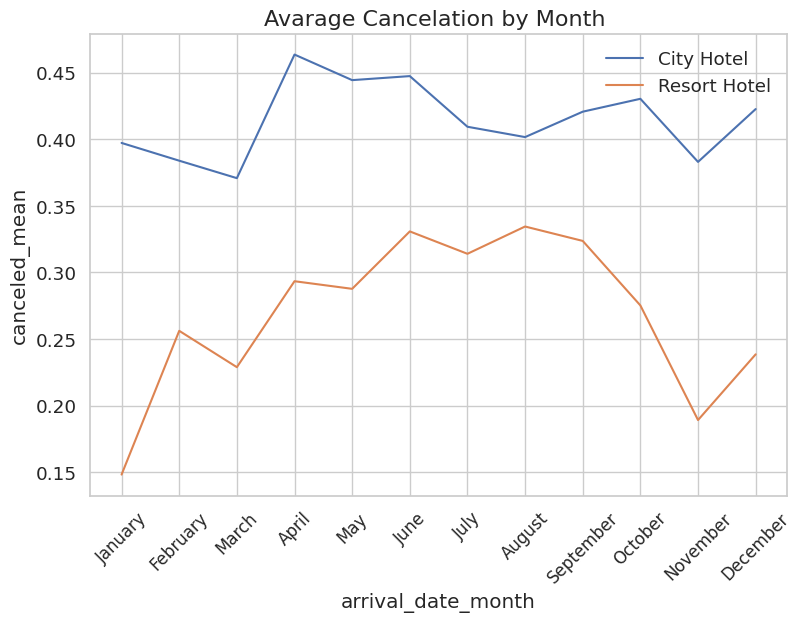

In [14]:
plt.subplots(figsize=(9,6))
sns.lineplot(data=monthly_cancelations, x="arrival_date_month", y="canceled_mean", hue="hotel")
plt.title("Avarage Cancelation by Month ", fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.legend(ncol=1, loc="upper right", frameon=False)
plt.show()

**Obs:** 2015 e 2017 have less records...

### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Cancelations by Season</p></div>

In [15]:
#High Season( June, July, August) no Resort Ee City Hotel
print('Avarage cancelations during high season - City Hotel:', monthly_cancelations.canceled_mean.loc[(monthly_cancelations['hotel']=='City Hotel') & ((monthly_cancelations['arrival_date_month']=='June') | (monthly_cancelations['arrival_date_month']=='July') | (monthly_cancelations['arrival_date_month']=='August'))].mean())
print('Avarage cancelations during low season - Resort Hotel:', monthly_cancelations.canceled_mean.loc[(monthly_cancelations['hotel']=='Resort Hotel') & ((monthly_cancelations['arrival_date_month']=='June') | (monthly_cancelations['arrival_date_month']=='July') | (monthly_cancelations['arrival_date_month']=='August'))].mean())

Avarage cancelations during high season - City Hotel: 0.4194472317004136
Avarage cancelations during low season - Resort Hotel: 0.3264409959482948


In [16]:
#Low Season( Novembro, Janeiro, Fevereiro, Março) no Resort Ee City Hotel
print('Avarage cancelations during low season - City Hotel:', monthly_cancelations.canceled_mean.loc[(monthly_cancelations['hotel']=='City Hotel') & ((monthly_cancelations['arrival_date_month']=='November') | (monthly_cancelations['arrival_date_month']=='January') | (monthly_cancelations['arrival_date_month']=='February') | (monthly_cancelations['arrival_date_month']=='March'))].mean())
print('Avarage cancelations during low season - Resort Hotel:', monthly_cancelations.canceled_mean.loc[(monthly_cancelations['hotel']=='Resort Hotel') & ((monthly_cancelations['arrival_date_month']=='November') | (monthly_cancelations['arrival_date_month']=='January') | (monthly_cancelations['arrival_date_month']=='February') | (monthly_cancelations['arrival_date_month']=='March'))].mean())

Avarage cancelations during low season - City Hotel: 0.38371656061118026
Avarage cancelations during low season - Resort Hotel: 0.2056763308892052


**H2:** False, considering that the European high season refers to the months of June, July, August and the low season to the months of November, January, February and March; on average the rate of cancellations increased in both hotels

### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Cancelations by Lead Time</p></div>

In [17]:
lead_cancel=data.groupby(['lead_time','hotel']).agg( reservations = ('lead_time', 'size'),
                                                     canceled_mean = ('is_canceled', 'mean')).reset_index()
lead_cancel

,lead_time,hotel,reservations,canceled_mean
0,0,City Hotel,3042,0.0897
1,0,Resort Hotel,3235,0.0485
2,1,City Hotel,1855,0.1256
3,1,Resort Hotel,1593,0.0552
4,2,City Hotel,1126,0.1128
...,...,...,...,...
860,622,City Hotel,17,1.0000
861,626,City Hotel,30,1.0000
862,629,City Hotel,17,1.0000
863,709,Resort Hotel,1,0.0000


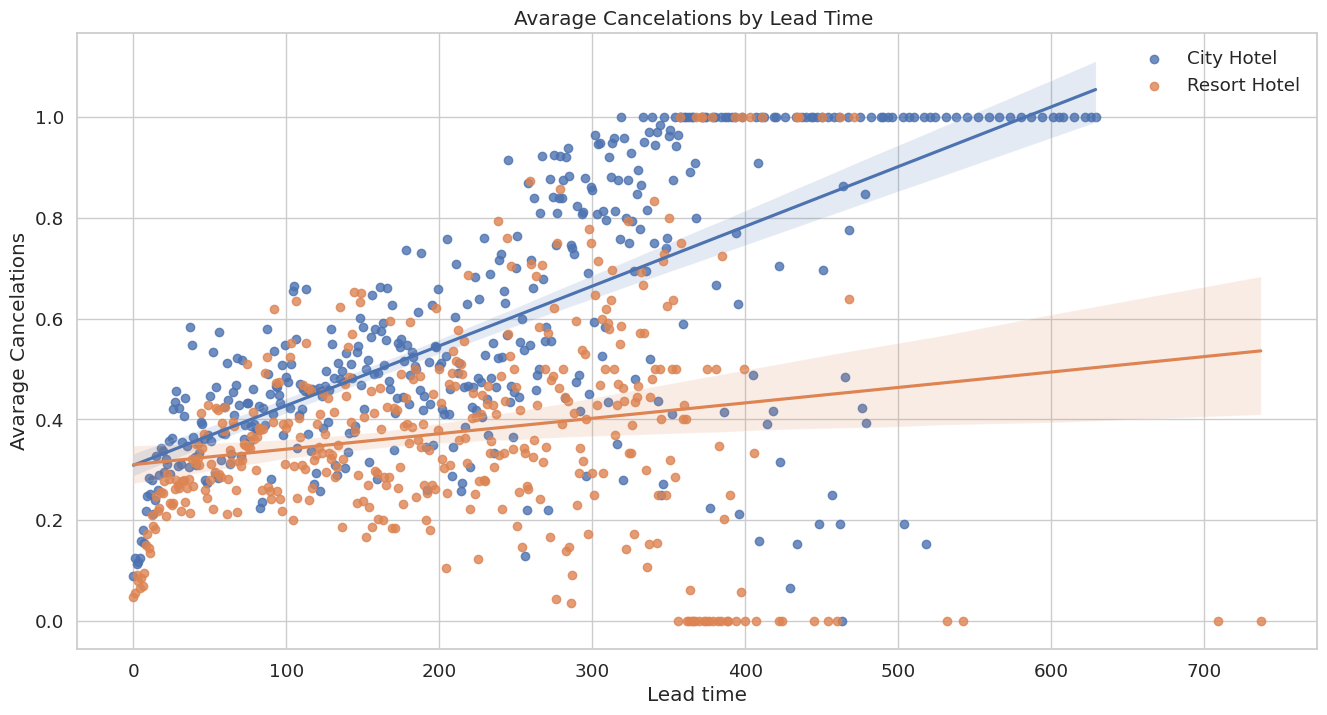

In [18]:
plt.figure(figsize=(16, 8))
sns.regplot(data=lead_cancel.loc[lead_cancel.hotel=='City Hotel'], x='lead_time', y='canceled_mean', label='City Hotel')
sns.regplot(data=lead_cancel.loc[lead_cancel.hotel=='Resort Hotel'], x='lead_time', y='canceled_mean', label='Resort Hotel')
plt.legend(ncol=1, loc="upper right", frameon=False)
plt.title("Avarage Cancelations by Lead Time ")
plt.xlabel("Lead time")
plt.ylabel("Avarage Cancelations")
# plt.xlim(0,365)
plt.show()

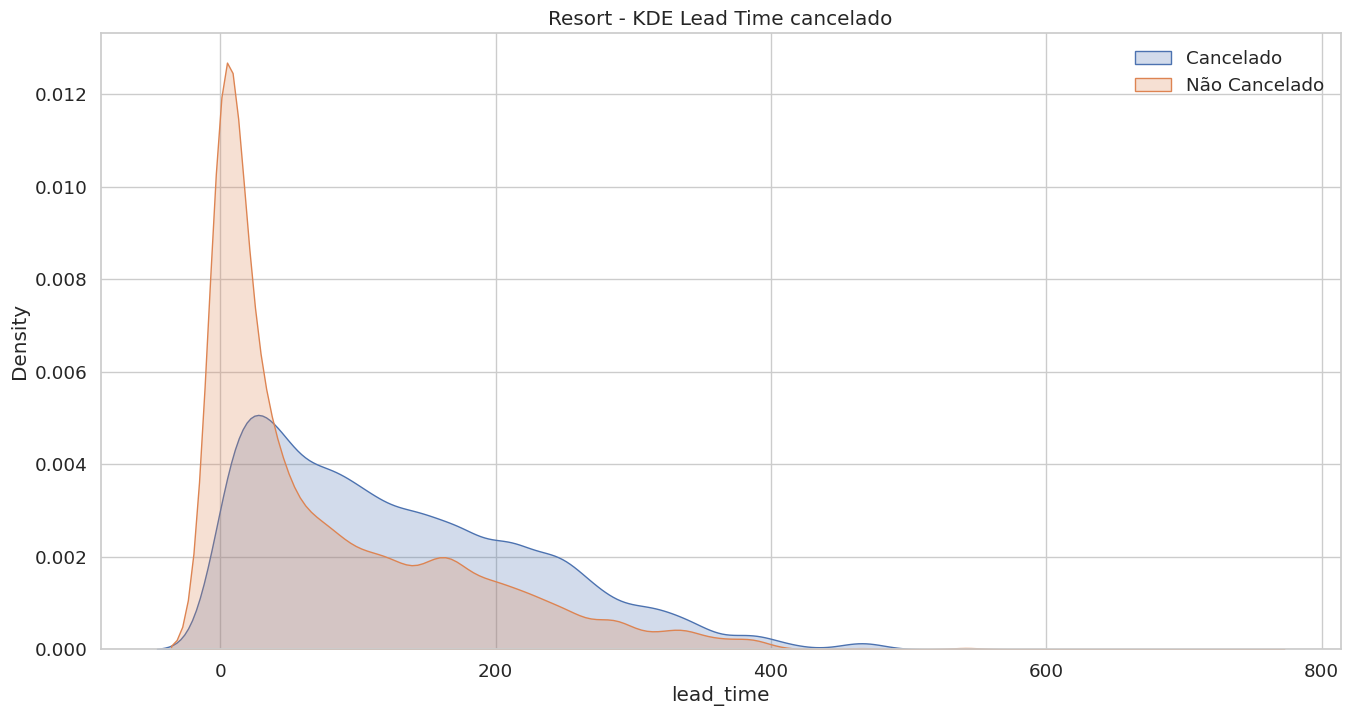

In [19]:
plt.figure(figsize=(16,8))
plt.title('Resort - KDE Lead Time cancelado')
sns.kdeplot(data=rh.loc[(rh.is_canceled == 1)], x='lead_time', fill=True, label='Cancelado')#, 
sns.kdeplot(data=rh.loc[(rh.is_canceled == 0)], x='lead_time', fill=True, label='Não Cancelado')#, 
plt.legend(ncol=1, loc="upper right", frameon=False);

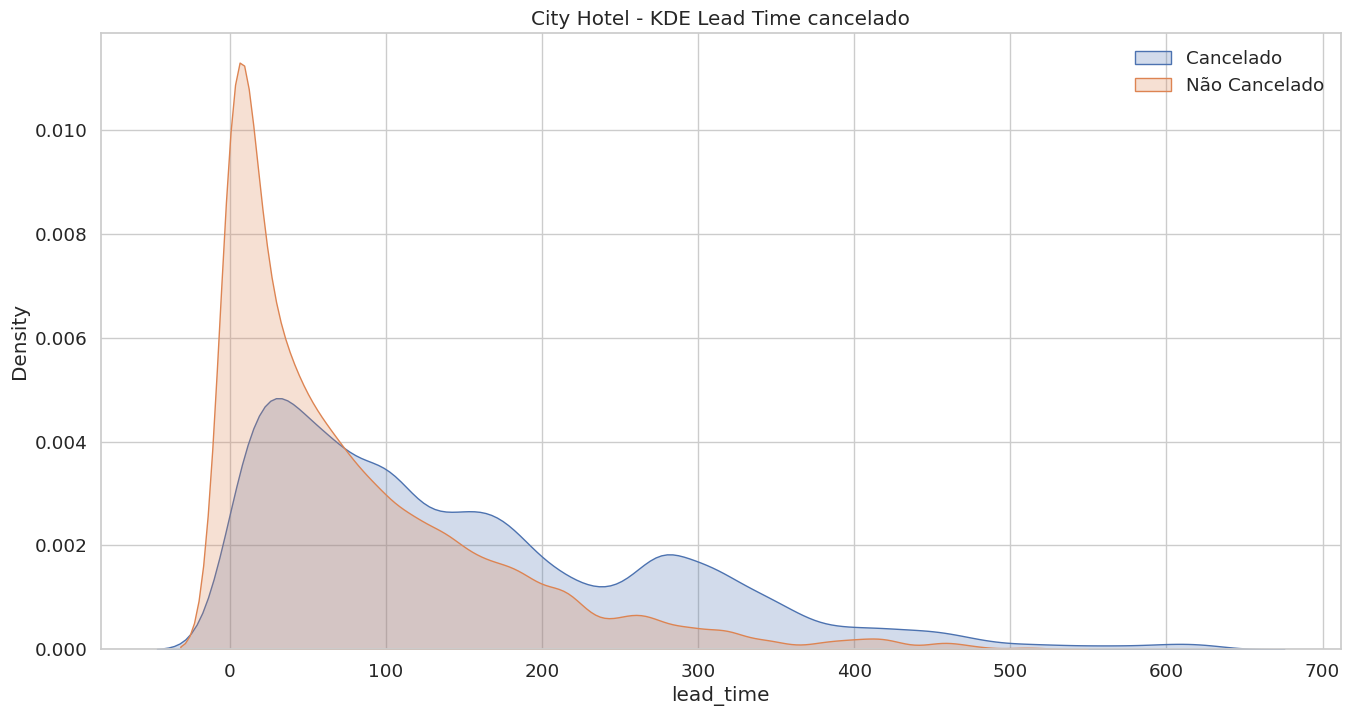

In [20]:
plt.figure(figsize=(16,8))
plt.title('City Hotel - KDE Lead Time cancelado')
sns.kdeplot(data=ch.loc[(ch.is_canceled == 1)], x='lead_time', fill=True, label='Cancelado') 
sns.kdeplot(data=ch.loc[(ch.is_canceled == 0)], x='lead_time', fill=True, label='Não Cancelado')
plt.legend(ncol=1, loc="upper right", frameon=False);

In [21]:
print('Avarage Cancelations below 10 days of Lead Time on City Hotel:', ch.is_canceled.loc[(ch.lead_time <= 10)].mean())
print('Avarage Cancelations below 10 days of Lead Time on Resort Hotel:', rh.is_canceled.loc[(rh.lead_time <= 10)].mean())

print('Avarage Cancelations above 10 days of Lead Time on City Hotel:', ch.is_canceled.loc[(ch.lead_time > 10)].mean())
print('Avarage Cancelations above 10 days of Lead Time on Resort Hotel:', rh.is_canceled.loc[(rh.lead_time > 10)].mean())

Avarage Cancelations below 10 days of Lead Time on City Hotel: 0.14225974435852928
Avarage Cancelations below 10 days of Lead Time on Resort Hotel: 0.07568693581985914
Avarage Cancelations above 10 days of Lead Time on City Hotel: 0.47057673803223476
Avarage Cancelations above 10 days of Lead Time on Resort Hotel: 0.3456802482731004


**H3:** True, the average cancellation rate for a lead time of less than or equal to 10 days is 7.57% in the resort hotel and 14.22% in the urban hotel, less than 34.56% and 47.06%, which are the respective rates average cancellation rates for lead times greater than 10 days.

### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Cancelations by Country</p></div>

In [22]:
xxx=data.groupby(['continentes','hotel']).agg( reservations = ('continentes', 'size'),
                                               canceled_mean = ('is_canceled', 'mean')).sort_values(by='reservations', ascending=False).reset_index()

xxx

,continentes,hotel,reservations,canceled_mean
0,Europe,City Hotel,39640,0.2497
1,Native,City Hotel,30874,0.6504
2,Europe,Resort Hotel,19543,0.1634
3,Native,Resort Hotel,17622,0.4221
4,Asia,City Hotel,2802,0.4040
5,South America,City Hotel,2168,0.3861
6,North America,City Hotel,1760,0.2585
7,Unknow,Resort Hotel,1174,0.1201
8,Africa,City Hotel,939,0.4452
9,Unknow,City Hotel,600,0.3033


In [23]:
rh.country.nunique()-1,ch.country.nunique()-1

(125, 166)

In [24]:
country_cancel=data.groupby(['country','hotel']).agg( reservations = ('country', 'size'),
                                         canceled_mean = ('is_canceled', 'mean')).sort_values(by='reservations', ascending=False).reset_index()


country_cancel.head(10).style.background_gradient(cmap='Blues')

,country,hotel,reservations,canceled_mean
0,PRT,City Hotel,30874,0.650418
1,PRT,Resort Hotel,17622,0.422086
2,FRA,City Hotel,8792,0.195974
3,GBR,Resort Hotel,6812,0.130799
4,DEU,City Hotel,6082,0.176258
5,GBR,City Hotel,5308,0.294273
6,ESP,City Hotel,4604,0.288010
7,ESP,Resort Hotel,3956,0.215116
8,ITA,City Hotel,3302,0.379467
9,IRL,Resort Hotel,2166,0.199446


In [25]:
#Top 10 Paises que mais cancelam reservas no City Hotel( min 50 reservas)
country_cancel.loc[(country_cancel['hotel']=='City Hotel') & (country_cancel['reservations']>50)].sort_values(by='canceled_mean', ascending=False).head(10)

,country,hotel,reservations,canceled_mean
0,PRT,City Hotel,30874,0.6504
36,AGO,City Hotel,338,0.5858
19,CHN,City Hotel,865,0.5237
41,TUR,City Hotel,225,0.4222
53,KOR,City Hotel,124,0.4194
67,ZAF,City Hotel,62,0.4194
11,BRA,City Hotel,1792,0.4068
31,RUS,City Hotel,441,0.4036
43,LUX,City Hotel,206,0.4029
46,MAR,City Hotel,184,0.3967


In [26]:
#Top 10 Paises que menos cancelam reservas no City Hotel( min 50 reservas)
country_cancel.loc[(country_cancel['hotel']=='City Hotel') & (country_cancel['reservations']>50)].sort_values(by='canceled_mean', ascending=True).head(10)

,country,hotel,reservations,canceled_mean
57,SRB,City Hotel,94,0.0319
74,ISL,City Hotel,51,0.0784
69,NZL,City Hotel,60,0.1000
62,MEX,City Hotel,79,0.1266
45,JPN,City Hotel,188,0.1489
65,BGR,City Hotel,70,0.1714
58,DZA,City Hotel,91,0.1758
4,DEU,City Hotel,6082,0.1763
40,FIN,City Hotel,295,0.1797
18,AUT,City Hotel,1053,0.1861


In [27]:
#Top 10 Paises que mais cancelam reservas no Resort Hotel( min 50 reservas)
country_cancel.loc[(country_cancel['hotel']=='Resort Hotel') & (country_cancel['reservations']>50)].sort_values(by='canceled_mean', ascending=False).head(10)

,country,hotel,reservations,canceled_mean
64,MAR,Resort Hotel,75,0.4800
1,PRT,Resort Hotel,17622,0.4221
61,LUX,Resort Hotel,80,0.3250
44,RUS,Resort Hotel,189,0.3228
32,CHE,Resort Hotel,435,0.2575
39,SWE,Resort Hotel,304,0.2401
33,BRA,Resort Hotel,430,0.2349
7,ESP,Resort Hotel,3956,0.2151
9,IRL,Resort Hotel,2166,0.1994
54,NOR,Resort Hotel,123,0.1870


In [28]:
#Top 10 Paises que menos cancelam reservas no Resort Hotel( min 50 reservas)
country_cancel.loc[(country_cancel['hotel']=='Resort Hotel') & (country_cancel['reservations']>50)].sort_values(by='canceled_mean', ascending=True).head(10)

,country,hotel,reservations,canceled_mean
52,CHN,Resort Hotel,134,0.0672
66,DNK,Resort Hotel,65,0.0769
28,Unknow,Resort Hotel,464,0.0970
50,FIN,Resort Hotel,151,0.1060
25,NLD,Resort Hotel,514,0.1089
37,POL,Resort Hotel,333,0.1171
17,DEU,Resort Hotel,1203,0.1214
3,GBR,Resort Hotel,6812,0.1308
13,FRA,Resort Hotel,1610,0.1311
30,BEL,Resort Hotel,448,0.1317


### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Cancelation by previous cancelations</p></div>

In [29]:
previous_cancel=data.groupby(['previous_cancellations','hotel']).agg( reservations = ('previous_cancellations', 'size'),
                                                                      canceled_mean = ('is_canceled', 'mean')).reset_index()

previous_cancel

,previous_cancellations,hotel,reservations,canceled_mean
0,0,City Hotel,73800,0.3805
1,0,Resort Hotel,38953,0.2618
2,1,City Hotel,5154,0.9631
3,1,Resort Hotel,896,0.8371
4,2,City Hotel,70,0.1857
5,2,Resort Hotel,44,0.5682
6,3,City Hotel,51,0.1373
7,3,Resort Hotel,14,0.9286
8,4,City Hotel,25,0.1600
9,4,Resort Hotel,6,0.5000


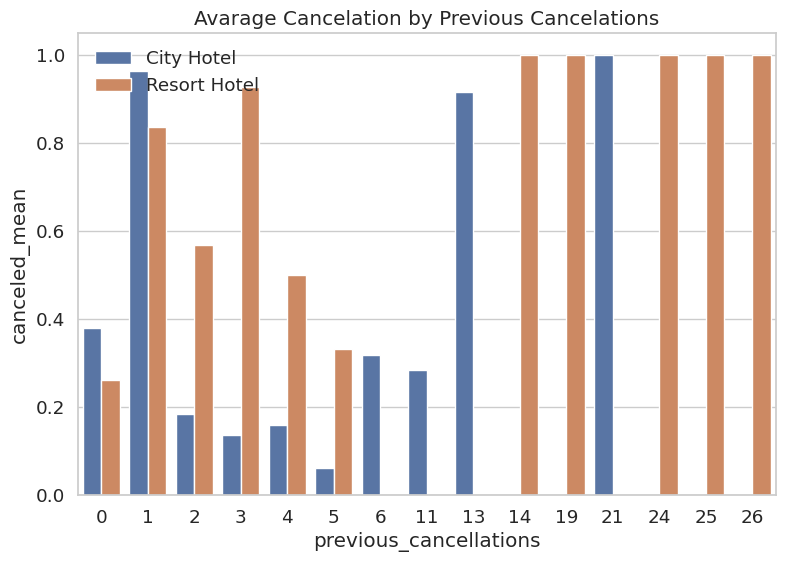

In [30]:
plt.subplots(figsize=(9,6))
sns.barplot(data=previous_cancel, x="previous_cancellations", y='canceled_mean', hue="hotel")
plt.title("Avarage Cancelation by Previous Cancelations")
#plt.xlim(-1,6)
plt.legend(ncol=1, loc="best", frameon=False);

In [31]:
print('Taxa de Cancelamento médio City Hotel de quem não possui registro de cancelamento anterior',ch.is_canceled.loc[(ch.previous_cancellations == 0)].mean())
print('Taxa de Cancelamento médio City Hotel de quem possui ao menos um registro de cancelamento anterior',ch.is_canceled.loc[(ch.previous_cancellations > 0)].mean())

print('Taxa de Cancelamento médio Resort Hotel de quem não possui registro de cancelamento anterior',rh.is_canceled.loc[(rh.previous_cancellations == 0)].mean())
print('Taxa de Cancelamento médio Resort Hotel de quem possui ao menos um registro de cancelamento anterior',rh.is_canceled.loc[(rh.previous_cancellations > 0)].mean())

Taxa de Cancelamento médio City Hotel de quem não possui registro de cancelamento anterior 0.3805420054200542
Taxa de Cancelamento médio City Hotel de quem possui ao menos um registro de cancelamento anterior 0.9316747122168585
Taxa de Cancelamento médio Resort Hotel de quem não possui registro de cancelamento anterior 0.26180268528739764
Taxa de Cancelamento médio Resort Hotel de quem possui ao menos um registro de cancelamento anterior 0.8438356164383561


**H5:** True, the average cancellation rate for those who do not have a previous cancellation record at City and Resort Hotel is 38.05% and 26.18%. Those who have at least one cancellation record are 93.16% and 84.38% respectively.

### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Cancelations by Special Request</p></div>

In [32]:
especial_cancel=data.groupby(['total_of_special_requests','hotel']).agg( reservations = ('total_of_special_requests', 'size'),
                                                                      canceled_mean = ('is_canceled', 'mean')).reset_index()

especial_cancel

,total_of_special_requests,hotel,reservations,canceled_mean
0,0,City Hotel,47873,0.5502
1,0,Resort Hotel,22349,0.3229
2,1,City Hotel,21379,0.2208
3,1,Resort Hotel,11806,0.2200
4,2,City Hotel,8125,0.2140
5,2,Resort Hotel,4827,0.2335
6,3,City Hotel,1585,0.1767
7,3,Resort Hotel,910,0.1824
8,4,City Hotel,198,0.1061
9,4,Resort Hotel,142,0.1056


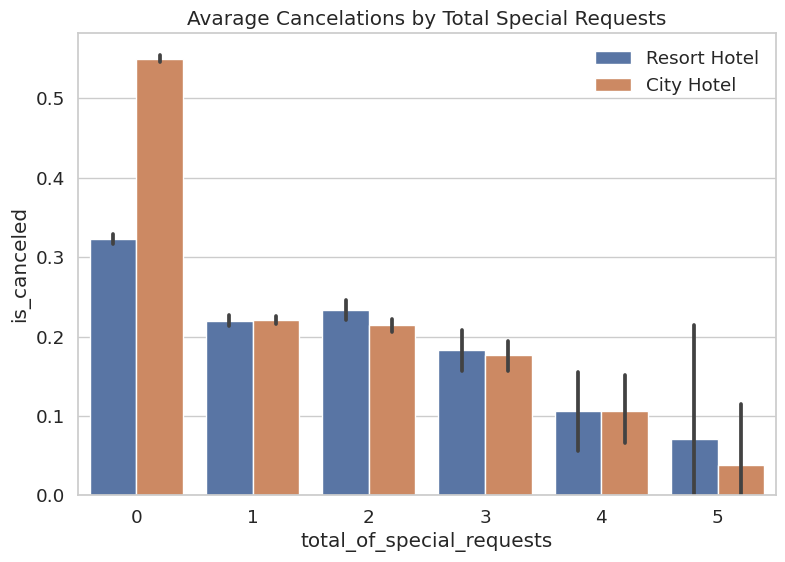

In [33]:
plt.subplots(figsize=(9,6))
sns.barplot(data=data, x="total_of_special_requests", y="is_canceled", hue="hotel")
plt.title("Avarage Cancelations by Total Special Requests")
plt.legend(ncol=1, loc="upper right", frameon=False)
plt.show()

In [34]:
print('Taxa de Cancelamento médio City Hotel sem requisições especiais',ch.is_canceled.loc[(ch.total_of_special_requests == 0)].mean())
print('Taxa de Cancelamento médio City Hotel com pelo menos uma requisição especial',ch.is_canceled.loc[(ch.total_of_special_requests > 0)].mean())

print('Taxa de Cancelamento médio Resort Hotel sem requisições especiais',rh.is_canceled.loc[(rh.total_of_special_requests == 0)].mean())
print('Taxa de Cancelamento médio Resort Hotel com pelo menos uma requisição especial',rh.is_canceled.loc[(rh.total_of_special_requests > 0)].mean())

Taxa de Cancelamento médio City Hotel sem requisições especiais 0.5502057527207402
Taxa de Cancelamento médio City Hotel com pelo menos uma requisição especial 0.2159486475265864
Taxa de Cancelamento médio Resort Hotel sem requisições especiais 0.32287798111772337
Taxa de Cancelamento médio Resort Hotel com pelo menos uma requisição especial 0.22069043448782416


**H4** True, the average cancellation rate for those who do not make any special requests at City and Resort Hotel is 55.02% and 32.29% and those who make at least one special request are 21.59% and 22.07% respectively.

### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Cancelations by car parking required</p></div>

In [35]:
# car_cancel=data.groupby(['required_car_parking_spaces','hotel']).agg( reservations = ('required_car_parking_spaces', 'size'),
#                                                                       canceled_mean = ('is_canceled', 'mean')).reset_index()

# car_cancel

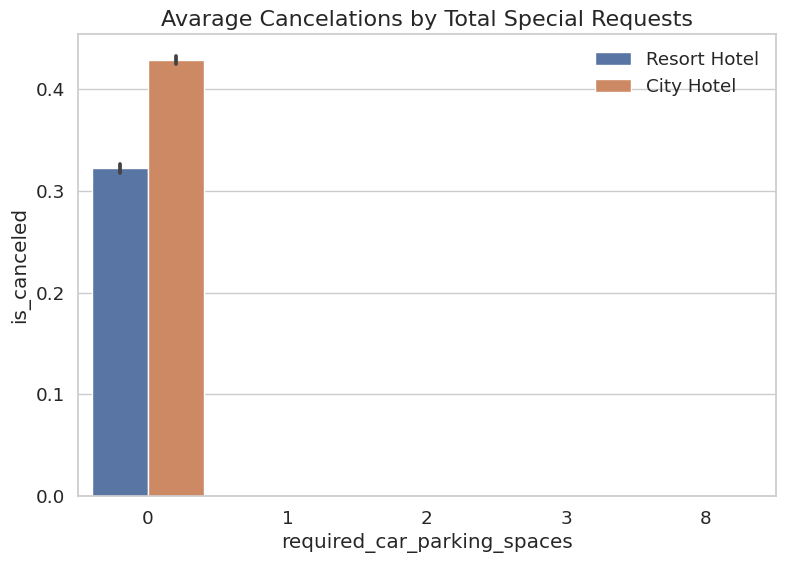

In [36]:
plt.subplots(figsize=(9,6))
sns.barplot(data=data, x="required_car_parking_spaces", y="is_canceled", hue="hotel")
plt.title("Avarage Cancelations by Total Special Requests", fontsize=16)
plt.legend(ncol=1, loc="upper right", frameon=False)
plt.show()

In [37]:
print('Taxa de Cancelamento médio City Hotel sem requisição de estacionamento',ch.is_canceled.loc[(ch.required_car_parking_spaces == 0)].mean())
print('Taxa de Cancelamento médio City Hotel com pelo menos uma requisição de vaga de estacionamento',ch.is_canceled.loc[(ch.required_car_parking_spaces > 0)].mean())

print('Taxa de Cancelamento médio Resort Hotel sem requisição de estacionamento',rh.is_canceled.loc[(rh.required_car_parking_spaces == 0)].mean())
print('Taxa de Cancelamento médio Resort Hotel com pelo menos uma requisição de vaga de estacionamento',rh.is_canceled.loc[(rh.required_car_parking_spaces > 0)].mean())

Taxa de Cancelamento médio City Hotel sem requisição de estacionamento 0.42841612093288123
Taxa de Cancelamento médio City Hotel com pelo menos uma requisição de vaga de estacionamento 0.0
Taxa de Cancelamento médio Resort Hotel sem requisição de estacionamento 0.3218264417373188
Taxa de Cancelamento médio Resort Hotel com pelo menos uma requisição de vaga de estacionamento 0.0


### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Cancelamentos por Quarto</p></div>

In [38]:
previous_cancel=data.groupby(['reserved_room_type','hotel']).agg( reservations = ('reserved_room_type', 'size'),
                                                                      canceled_mean = ('is_canceled', 'mean')).reset_index()
previous_cancel

,reserved_room_type,hotel,reservations,canceled_mean
0,A,City Hotel,62489,0.4360
1,A,Resort Hotel,23388,0.2729
2,B,City Hotel,1113,0.3306
3,B,Resort Hotel,3,0.0000
4,C,City Hotel,13,0.3846
5,C,Resort Hotel,918,0.3301
6,D,City Hotel,11748,0.3530
7,D,Resort Hotel,7432,0.2631
8,E,City Hotel,1543,0.3273
9,E,Resort Hotel,4982,0.2828


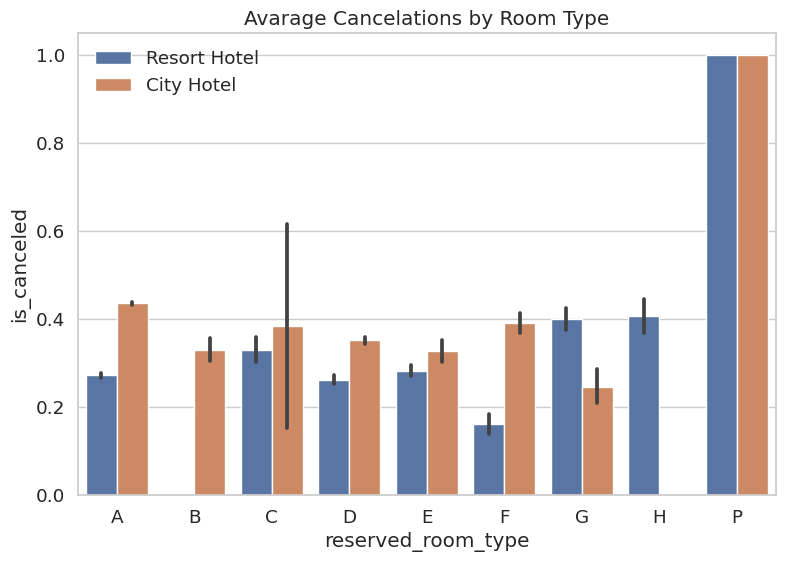

In [39]:
plt.subplots(figsize=(9,6))
sns.barplot(data=data, x="reserved_room_type", y="is_canceled", hue="hotel", order=['A','B','C','D','E','F','G','H','P'])
plt.title("Avarage Cancelations by Room Type")
plt.legend(ncol=1, loc="upper left", frameon=False);

In [40]:
data.loc[data['reserved_room_type']=='P']

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,people,kids,days_stay,country_name,continentes
4122,Resort Hotel,1,0,2016,February,8,15,0,0,0,0,0,SC,Unknow,Offline TA/TO,TA/TO,0,...,P,0,No Deposit,0,383,0,Transient,0.0000,0,0,Canceled,2016-02-15,0,0,0,Unknow,Unknow
9371,Resort Hotel,1,0,2016,November,48,21,0,0,0,0,0,SC,Unknow,Offline TA/TO,TA/TO,0,...,P,0,No Deposit,0,386,0,Group,0.0000,0,0,Canceled,2016-11-21,0,0,0,Unknow,Unknow
60626,City Hotel,1,0,2016,November,47,17,4,11,0,0,0,SC,Unknow,Corporate,Direct,0,...,P,0,No Deposit,0,279,0,Transient,0.0000,0,0,Canceled,2016-11-17,0,0,15,Unknow,Unknow
61219,City Hotel,1,0,2016,December,50,6,0,0,0,0,0,SC,Unknow,Complementary,Corporate,0,...,P,0,No Deposit,0,279,0,Transient,0.0000,0,0,Canceled,2016-12-06,0,0,0,Unknow,Unknow
61220,City Hotel,1,0,2016,December,50,6,0,0,0,0,0,SC,Unknow,Complementary,Corporate,0,...,P,0,No Deposit,0,279,0,Transient,0.0000,0,0,Canceled,2016-12-06,0,0,0,Unknow,Unknow
61224,City Hotel,1,0,2016,December,50,6,0,0,0,0,0,SC,Unknow,Complementary,Corporate,0,...,P,0,No Deposit,0,279,0,Transient,0.0000,0,0,Canceled,2016-12-06,0,0,0,Unknow,Unknow
65882,City Hotel,1,0,2017,April,15,10,0,0,0,0,0,SC,Unknow,Complementary,Corporate,0,...,P,0,No Deposit,0,279,0,Transient,0.0000,0,0,Canceled,2017-04-10,0,0,0,Unknow,Unknow
65883,City Hotel,1,0,2017,April,15,10,0,0,0,0,0,SC,Unknow,Complementary,Corporate,0,...,P,0,No Deposit,0,279,0,Transient,0.0000,0,0,Canceled,2017-04-10,0,0,0,Unknow,Unknow
65884,City Hotel,1,0,2017,April,15,10,0,0,0,0,0,SC,Unknow,Complementary,Corporate,0,...,P,0,No Deposit,0,279,0,Transient,0.0000,0,0,Canceled,2017-04-10,0,0,0,Unknow,Unknow
65885,City Hotel,1,0,2017,April,15,10,0,0,0,0,0,SC,Unknow,Complementary,Corporate,0,...,P,0,No Deposit,0,279,0,Transient,0.0000,0,0,Canceled,2017-04-10,0,0,0,Unknow,Unknow


### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Cancelations by Agency</p></div>

In [41]:
agent_cancel=data.groupby(['agent','hotel']).agg( reservations = ('agent', 'size'),
                                                  adr_mean = ('adr', 'mean'),
                                     canceled_mean = ('is_canceled', 'mean')).sort_values(by='reservations',ascending=False).reset_index()

agent_cancel.head(20)

,agent,hotel,reservations,adr_mean,canceled_mean
0,9,City Hotel,31918,122.6706,0.4155
1,240,Resort Hotel,13905,116.1123,0.3943
2,0,Resort Hotel,8202,75.6952,0.1733
3,0,City Hotel,8093,93.3845,0.3224
4,1,City Hotel,7134,71.4083,0.7331
5,14,City Hotel,3633,125.7274,0.1795
6,7,City Hotel,3532,95.9126,0.1342
7,250,Resort Hotel,2869,132.6236,0.1788
8,6,City Hotel,2683,99.1589,0.3600
9,241,Resort Hotel,1721,100.3922,0.1371


In [42]:
most10_ch_agent= agent_cancel.loc[(agent_cancel['hotel']=='City Hotel') & (agent_cancel['agent']!=0)]#.head(15)
most10_ch_agent['ratio'] = most10_ch_agent['adr_mean']/most10_ch_agent['reservations']
most10_ch_agent=most10_ch_agent.loc[most10_ch_agent['reservations']>100]
most10_ch_agent.sort_values(by='canceled_mean',ascending=False).head(30)

/tmp/ipykernel_4986/3862164498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most10_ch_agent['ratio'] = most10_ch_agent['adr_mean']/most10_ch_agent['reservations']


,agent,hotel,reservations,adr_mean,canceled_mean,ratio
89,5,City Hotel,102,74.0039,1.0000,0.7255
69,326,City Hotel,160,80.0000,1.0000,0.5000
48,236,City Hotel,247,116.6802,1.0000,0.4724
68,31,City Hotel,162,113.0864,0.9506,0.6981
36,58,City Hotel,335,97.7834,0.8806,0.2919
21,29,City Hotel,678,98.0037,0.8024,0.1445
41,44,City Hotel,292,103.9863,0.7945,0.3561
14,19,City Hotel,1061,103.8978,0.7352,0.0979
4,1,City Hotel,7134,71.4083,0.7331,0.0100
65,154,City Hotel,187,94.7457,0.7219,0.5067


In [43]:
agent_cancel.loc[(agent_cancel['hotel']=='Resort Hotel') & (agent_cancel['agent']!=0)].head(10)

,agent,hotel,reservations,adr_mean,canceled_mean
1,240,Resort Hotel,13905,116.1123,0.3943
7,250,Resort Hotel,2869,132.6236,0.1788
9,241,Resort Hotel,1721,100.3922,0.1371
15,40,Resort Hotel,1002,83.7158,0.0818
16,314,Resort Hotel,927,76.4097,0.1758
19,242,Resort Hotel,779,122.5382,0.3338
22,6,Resort Hotel,607,56.1383,0.0972
26,96,Resort Hotel,537,66.3927,0.4544
27,243,Resort Hotel,514,70.3109,0.0545
29,298,Resort Hotel,472,70.9258,0.3008


In [44]:
print(agent_cancel.canceled_mean.loc[(agent_cancel['hotel']=='City Hotel') & (agent_cancel['agent']!=0)].head(10).min())
print(agent_cancel.canceled_mean.loc[(agent_cancel['hotel']=='City Hotel') & (agent_cancel['agent']!=0)].head(10).max())

0.0663850331925166
0.7351555136663525


In [45]:
print(agent_cancel.canceled_mean.loc[(agent_cancel['hotel']=='Resort Hotel') & (agent_cancel['agent']!=0)].head(10).min())
print(agent_cancel.canceled_mean.loc[(agent_cancel['hotel']=='Resort Hotel') & (agent_cancel['agent']!=0)].head(10).max())

0.054474708171206226
0.4543761638733706


In [46]:
0.4543761638733706 - 0.054474708171206226

0.3999014557021644

In [47]:
best_5_rh_agency = rh.loc[(rh['agent']==0) | (rh['agent']==240) | (rh['agent']==250) | (rh['agent']==241) | (rh['agent']==40) | (rh['agent']==314)]

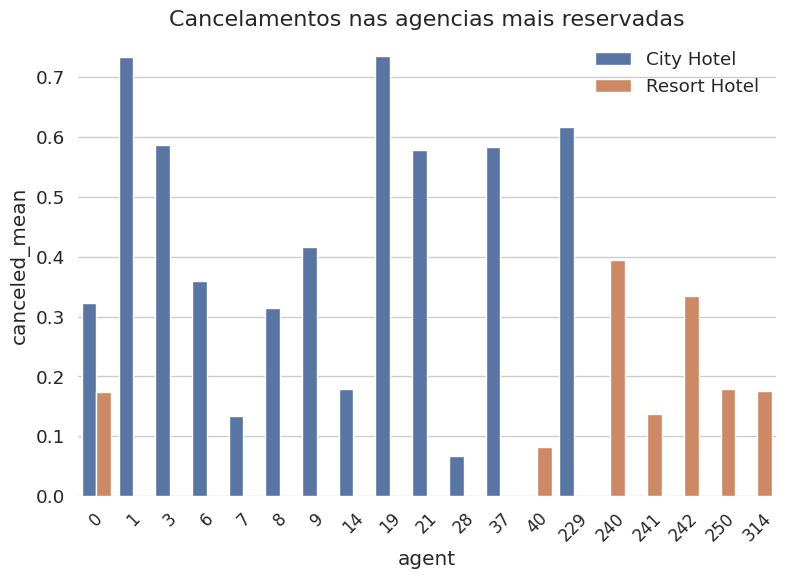

In [48]:
plt.subplots(figsize=(9,6))
sns.barplot(data=agent_cancel.head(20), x="agent", y="canceled_mean", hue="hotel")
plt.title("Cancelamentos nas agencias mais reservadas", fontsize=16)
#plt.xlabel("Month", labelpad=15, fontsize=14)
#plt.ylabel("Avarage Price [EUR]", labelpad=15, fontsize=14)
plt.xticks(rotation=45, fontsize=12)
#plt.yticks(fontsize=12)
plt.legend(ncol=1, loc="upper right", frameon=False)

sns.despine(left=True, bottom=True)
plt.show()

### <div style="color:white;display:fill;border-radius:5px;background-color:#2BBB8E;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Cancelamentos por Companhia</p></div>

In [49]:
company_cancel=data.groupby(['company','hotel','country']).agg( reservations = ('company', 'size'),
                                                     adr_mean = ('adr', 'mean'),
                                                     adr_sum = ('adr', 'sum'),
                                     canceled_mean = ('is_canceled', 'mean')).sort_values(by='reservations',ascending=False).reset_index()


company_cancel.head(20)

,company,hotel,country,reservations,adr_mean,adr_sum,canceled_mean
0,0,City Hotel,PRT,28238,93.9736,"2,653,626.4600",0.6846
1,0,Resort Hotel,PRT,15770,96.6715,"1,524,509.6400",0.4527
2,0,City Hotel,FRA,8631,112.4074,"970,187.9700",0.1981
3,0,Resort Hotel,GBR,6063,84.0915,"509,847.0400",0.1319
4,0,City Hotel,DEU,6010,108.8648,"654,277.2200",0.1784
5,0,City Hotel,GBR,5263,115.7028,"608,943.9700",0.2966
6,0,City Hotel,ESP,4397,115.7986,"509,166.3400",0.3009
7,0,Resort Hotel,ESP,3926,120.5457,"473,262.5800",0.2168
8,0,City Hotel,ITA,3227,115.6765,"373,287.9900",0.3877
9,0,Resort Hotel,IRL,2161,88.4471,"191,134.2200",0.1999


In [50]:
company_cancel.loc[(company_cancel['company']!=0)].head(20)

,company,hotel,country,reservations,adr_mean,adr_sum,canceled_mean
19,40,City Hotel,PRT,913,65.7946,"60,070.5000",0.0832
24,223,Resort Hotel,GBR,606,54.9870,"33,322.1000",0.1502
43,67,City Hotel,PRT,263,78.6635,"20,688.5000",0.6654
44,45,City Hotel,PRT,248,0.5585,138.5000,0.1129
55,219,City Hotel,PRT,141,90.0436,"12,696.1500",0.0638
60,154,Resort Hotel,PRT,115,48.5752,"5,586.1500",0.0435
63,153,City Hotel,PRT,94,102.0886,"9,596.3300",0.4362
65,51,City Hotel,PRT,86,100.8721,"8,675.0000",0.3953
72,405,Resort Hotel,GBR,75,53.3000,"3,997.5000",0.0000
74,174,City Hotel,PRT,72,98.3528,"7,081.4000",0.1944


In [51]:
company_cancel.company.loc[(company_cancel['canceled_mean']<0.3)&(company_cancel['company']!=0)].unique()

array([ 40, 223,  45, 219, 154, 405, 174,  94, 242, 331,  47,  20, 342,
       270,  68, 195,  91, 113,  38, 238, 281, 498,  86,  72,  62, 221,
        46, 337, 269, 507, 424, 148,  88, 153, 307, 178, 216, 204, 227,
       286, 523, 163, 169, 366, 407, 397, 396, 290, 343, 346, 408, 193,
       525, 274, 292, 355, 233, 144, 477, 390, 135,  12, 380,  99,   9,
        31, 112, 338, 127, 371,  81, 399, 103,  92, 485, 130, 504,  82,
       333, 150, 268, 323,  51,  83, 450, 435, 421,  34, 428, 203, 251,
        53, 384, 465, 329,  43, 379, 317, 291, 167, 108, 521, 437, 120,
       225, 360, 186, 511, 515, 364, 118, 418, 107,  78, 215, 159,  39,
       341, 302, 255, 105, 280, 254, 197, 180, 459, 470, 365, 218, 356,
       530,  16,  28, 383, 263, 116, 110, 209, 426, 185, 207, 410, 287,
       388, 382, 377, 297, 324,  42, 358,  49, 353, 409, 490, 494, 512,
       149, 146, 179, 240, 369, 357, 330, 143, 378, 115, 183, 443, 439,
       451, 245, 137, 220, 448, 139, 217, 230, 210, 232, 222, 43

In [52]:
company_cancel.company.loc[(company_cancel['canceled_mean']>0.3)&(company_cancel['company']!=0)].unique()

array([ 67, 153,  51, 223, 348, 135, 281, 197, 202, 308, 110, 385, 169,
       405, 280, 498, 233,  43, 122, 218, 179,  38,  37, 365,  47, 143,
       279, 418, 394, 209, 227, 329, 477, 366,  48, 428, 452, 392, 356,
       275,  62, 334, 331,  14, 457, 251, 445, 292, 409, 513, 466, 350,
       250, 277, 242, 321, 316, 543,  39,  78,  81,  84,  85,  91, 386,
       383,   9, 395, 531,  40, 360, 373, 370, 407, 486, 478, 461, 416,
       150, 115, 253, 203, 224, 309,  77,  59,  73,  93, 102])

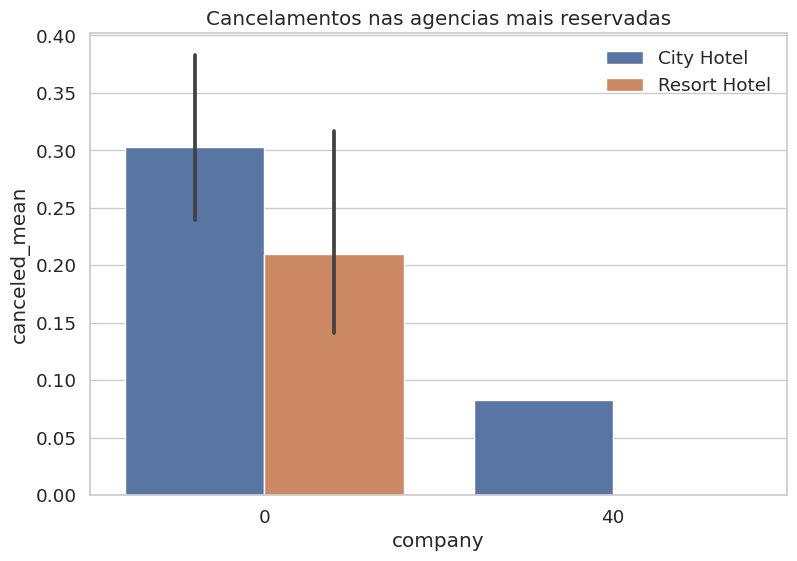

In [53]:
plt.subplots(figsize=(9,6))
sns.barplot(data=company_cancel.head(20), x="company", y="canceled_mean", hue="hotel")
plt.title("Cancelamentos nas agencias mais reservadas")
#plt.xlabel("Month", labelpad=15, fontsize=14)
#plt.ylabel("Avarage Price [EUR]", labelpad=15, fontsize=14)
#plt.xticks(rotation=45, fontsize=12)
#plt.yticks(fontsize=12)
plt.legend(ncol=1, loc="upper right", frameon=False)

plt.show()

In [54]:
x = data.loc[(data['company']!=0)]
x.market_segment.value_counts()

Corporate        4460
Groups           1389
Complementary     312
Aviation          210
Direct            207
Offline TA/TO     106
Online TA          94
Name: market_segment, dtype: int64

In [55]:
x.groupby(['market_segment']).agg( reservations = ('arrival_date_month', 'size'),
                                            adr_mean = ('adr', 'mean'),
                                            days_stay_mean = ('days_stay', 'mean'),                             
                                            people_mean = ('people', 'mean'),
                                            canceled_mean = ('is_canceled', 'mean')).reset_index()

,market_segment,reservations,adr_mean,days_stay_mean,people_mean,canceled_mean
0,Aviation,210,101.1556,3.6667,1.0143,0.2190
1,Complementary,312,1.6913,1.5513,1.3333,0.1378
2,Corporate,4460,69.2082,1.9962,1.2159,0.1805
3,Direct,207,71.8367,1.7440,1.4444,0.1063
4,Groups,1389,67.3286,3.5486,1.6443,0.1634
5,Offline TA/TO,106,86.8232,2.1604,1.6509,0.3396
6,Online TA,94,98.1279,2.3723,1.7340,0.1277


In [56]:
xxx = data_raw[['agent','market_segment','distribution_channel','company','customer_type','adr']].loc[(data_raw['agent'].isna())]

### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Cancelations by Deposit Type</p></div>

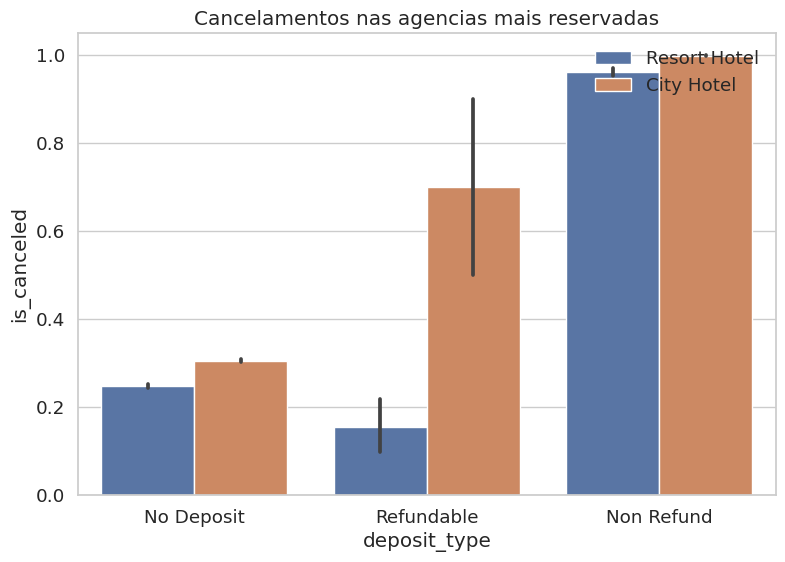

In [57]:
plt.subplots(figsize=(9,6))
sns.barplot(data=data, x="deposit_type", y="is_canceled", hue="hotel")
plt.title("Cancelamentos nas agencias mais reservadas")
plt.legend(ncol=1, loc="upper right", frameon=False);

In [58]:
data.deposit_type.value_counts()

No Deposit    104485
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

**OBS:** Probably this feature has wrong values. No Refund with such high cancellation rate is quite counterintuitive.

### <div style="color:white;display:fill;border-radius:5px;background-color:#2E6B8E;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">About ADR</p></div>

### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Days Stay</p></div>

In [59]:
data_ncanceled = data.loc[(data["is_canceled"] == 0)]
data_ncanceled = sort_month(data_ncanceled, 'arrival_date_month')

In [60]:
print('Tempo de estadia médio no City Hotel:',data_ncanceled.days_stay.loc[data_ncanceled['hotel']=='City Hotel'].mean())
print('Tempo de estadia médio no City Resort:',data_ncanceled.days_stay.loc[data_ncanceled['hotel']=='Resort Hotel'].mean())

Tempo de estadia médio no City Hotel: 2.9178890721291553
Tempo de estadia médio no City Resort: 4.142086704003319


**H7:** Falso, considerando que a alta temporada se Europeia se refere aos meses de junho, julho, agosto e a baixa temporada aos meses de novembro, janeiro, fevereiro e março; em média a taxa de cancelamentos para o hotel urbano foi de 4% menor na baixa temporada.

### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">ADR by Month</p></div>

In [61]:
monthly_adr = data_ncanceled.groupby(['arrival_date_month','hotel']).agg( reservations = ('arrival_date_month', 'size'),
                                            adr_mean = ('adr', 'mean'),
                                            days_stay_mean = ('days_stay', 'mean'),                             
                                            people_mean = ('people', 'mean')).reset_index()

monthly_adr = sort_month(monthly_adr, 'arrival_date_month')
monthly_adr

,arrival_date_month,hotel,reservations,adr_mean,days_stay_mean,people_mean
0,January,City Hotel,2249,82.3310,2.7732,1.7795
1,January,Resort Hotel,1866,48.7611,2.6929,1.7063
2,February,City Hotel,3051,86.5201,2.8673,1.8758
3,February,Resort Hotel,2308,54.1475,3.0308,1.8657
4,March,City Hotel,4049,90.6585,2.9983,1.8854
5,March,Resort Hotel,2570,57.0815,3.7027,1.7934
6,April,City Hotel,4010,111.9623,3.0232,2.0314
7,April,Resort Hotel,2550,75.8678,3.7808,1.8380
8,May,City Hotel,4568,120.6698,2.8159,1.8781
9,May,Resort Hotel,2535,76.6576,4.2320,1.9183


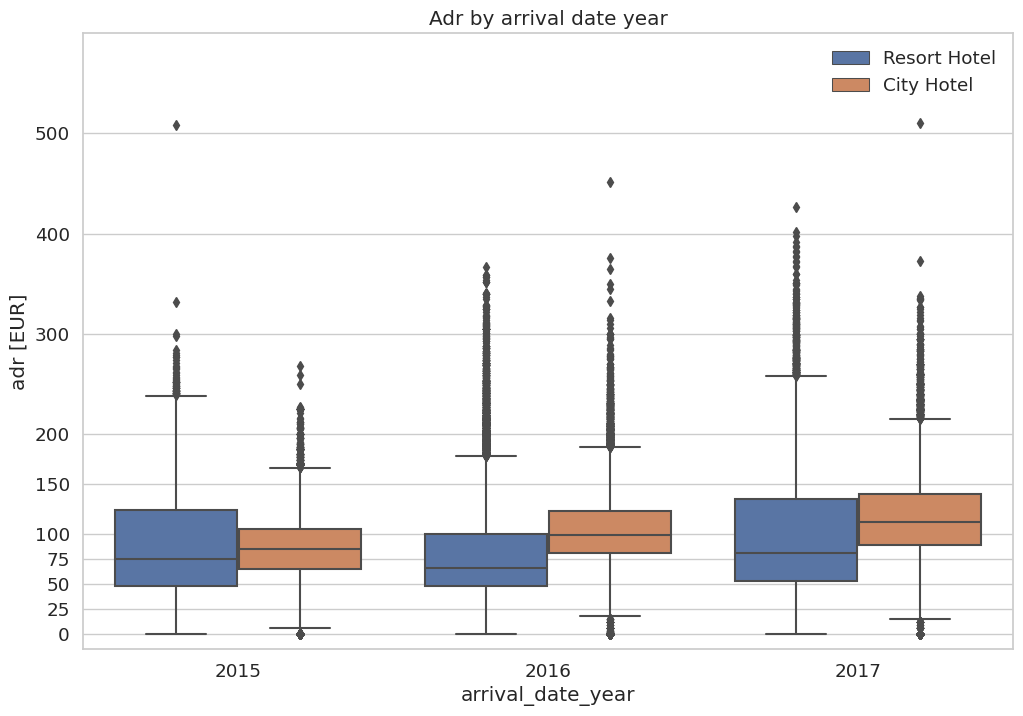

In [62]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_ncanceled, x="arrival_date_year", y="adr", hue="hotel")#, palette= 'rocket'
plt.title("Adr by arrival date year")
# plt.xlabel("Year")
plt.ylabel("adr [EUR]")
plt.yticks([0,25,50,75, 100,150,200,300,400,500])
plt.legend(ncol=1, loc="upper right", frameon=False)
plt.ylim(-15, 600)
plt.show()

In [63]:
print(data_ncanceled.days_stay.loc[(data_ncanceled.hotel == 'Resort Hotel')].mean())
print(data_ncanceled.days_stay.loc[(data_ncanceled.hotel == 'City Hotel')].mean())

4.142086704003319
2.9178890721291553


/tmp/ipykernel_4986/1983423800.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=data_ncanceled, x="arrival_date_month", y="adr", hue="hotel", ci="sd")


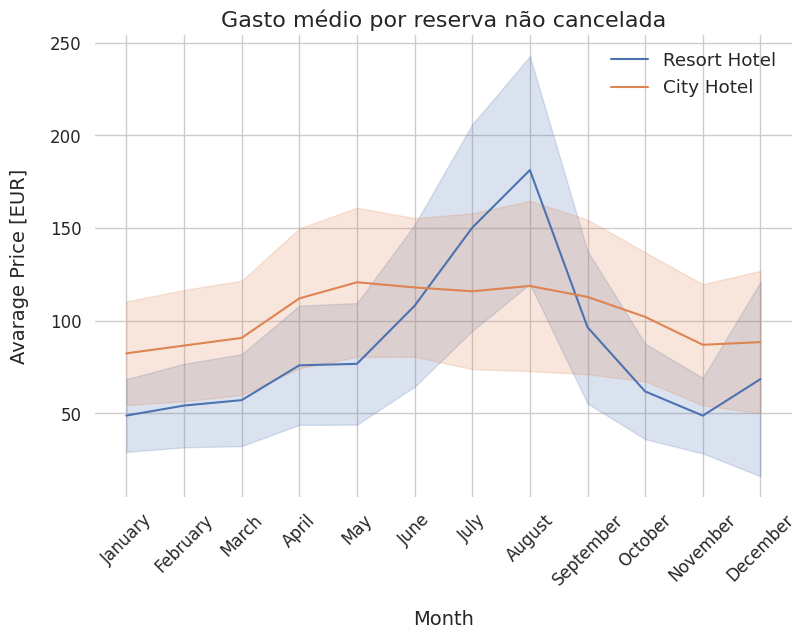

In [64]:
plt.subplots(figsize=(9,6))
sns.lineplot(data=data_ncanceled, x="arrival_date_month", y="adr", hue="hotel", ci="sd")
plt.title("Gasto médio por reserva não cancelada", fontsize=16)
plt.xlabel("Month", labelpad=15, fontsize=14)
plt.ylabel("Avarage Price [EUR]", labelpad=15, fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(ncol=1, loc="upper right", frameon=False)
sns.despine(left=True, bottom=True)
plt.show()

(-50.0, 600.0)

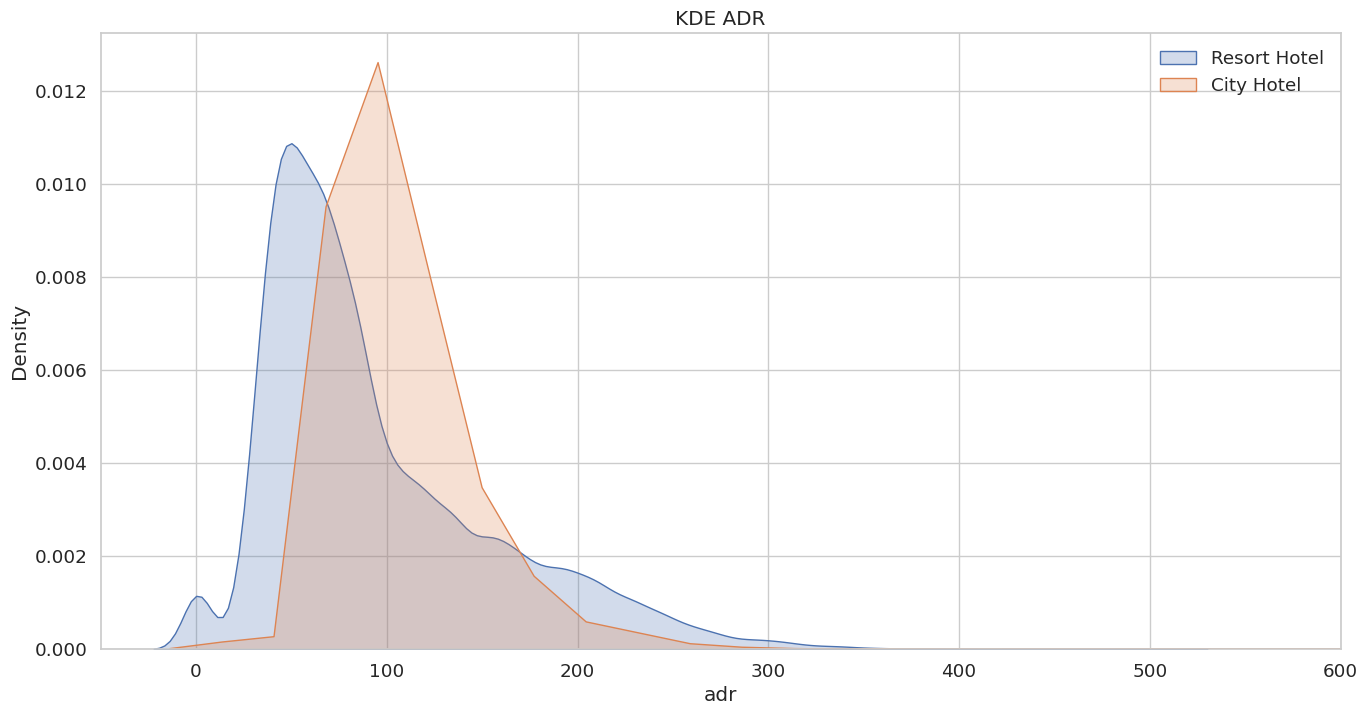

In [65]:
plt.figure(figsize=(16,8))
plt.title('KDE ADR')
sns.kdeplot(data=rh, x='adr', fill=True, label='Resort Hotel')#, 
sns.kdeplot(data=ch, x='adr', fill=True, label='City Hotel')#, 
plt.legend(ncol=1, loc="upper right", frameon=False)
plt.xlim(-50, 600)

### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">ADR by Market Segment</p></div>

In [67]:
data.groupby(['market_segment']).agg( reservation = ('market_segment', 'size'),
                                     adr_mean = ('adr', 'mean'),
                                     canceled_mean = ('is_canceled', 'mean'))

,reservation,adr_mean,canceled_mean
market_segment,,,
Aviation,235,100.9944,0.2213
Complementary,736,2.9138,0.1318
Corporate,5283,69.5152,0.1878
Direct,12582,115.6346,0.1537
Groups,19793,79.5519,0.6112
Offline TA/TO,24191,87.4468,0.3436
Online TA,56412,117.3097,0.3676
Undefined,2,15.0000,1.0000


In [72]:
data.groupby(['customer_type']).agg( reservation = ('customer_type', 'size'),
                                     adr_mean = ('adr', 'mean'),
                                     canceled_mean = ('is_canceled', 'mean'))

,reservation,adr_mean,canceled_mean
customer_type,,,
Contract,4072,87.6356,0.3099
Group,575,83.7678,0.1026
Transient,89496,107.1350,0.4080
Transient-Party,25091,86.1891,0.2546


In [71]:
data.groupby(['customer_type','market_segment']).agg( reservation = ('customer_type', 'size'),
                                     adr_mean = ('adr', 'mean'),
                                     canceled_mean = ('is_canceled', 'mean'))

reservation  adr_mean  canceled_mean
customer_type   market_segment                                      
Contract        Complementary             2    4.2000         0.0000
                Corporate                22   49.7545         0.1818
                Direct                   14   59.2857         0.1429
                Groups                  735   62.7287         0.9592
                Offline TA/TO          1816   79.9843         0.0920
                Online TA              1483  110.2915         0.2589
Group           Aviation                  2  110.0000         0.0000
                Complementary             6   13.1667         0.0000
                Corporate                28   86.2214         0.1786
                Direct                  134   97.5910         0.1343
                Groups                   16   55.6037         0.0000
                Offline TA/TO           211   75.2493         0.1185
                Online TA               178   87.6901         0.0618
Transient       Aviation                216  101.1050         0.2130
                Complementary           696    2.3724         0.1336
                Corporate              3570   67.9915         0.1832
                Direct                11317  116.8482         0.1557
                Groups                 8423   86.6877         0.9574
                Offline TA/TO         14034   85.7452         0.4269
                Online TA             51240  118.3849         0.3884
Transient-Party Aviation                 17   98.5294         0.3529
                Complementary            32   12.6875         0.1250
                Corporate              1663   72.7661         0.1978
                Direct                 1117  106.2096         0.1361
                Groups                10619   75.0923         0.3134
                Offline TA/TO          8130   92.3675         0.2617
                Online TA              3511  106.0841         0.1253
                Undefined                 2   15.0000         1.0000

## Multivariated Analysis

/tmp/ipykernel_4986/1145486551.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(data.corr(), dtype=bool)
/tmp/ipykernel_4986/1145486551.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(method='spearman'), linewidths=0.25,fmt=".2f", cmap="Blues", linecolor='w',annot=True,annot_kws={"size":9},mask=mask,cbar_kws={"shrink": .9});


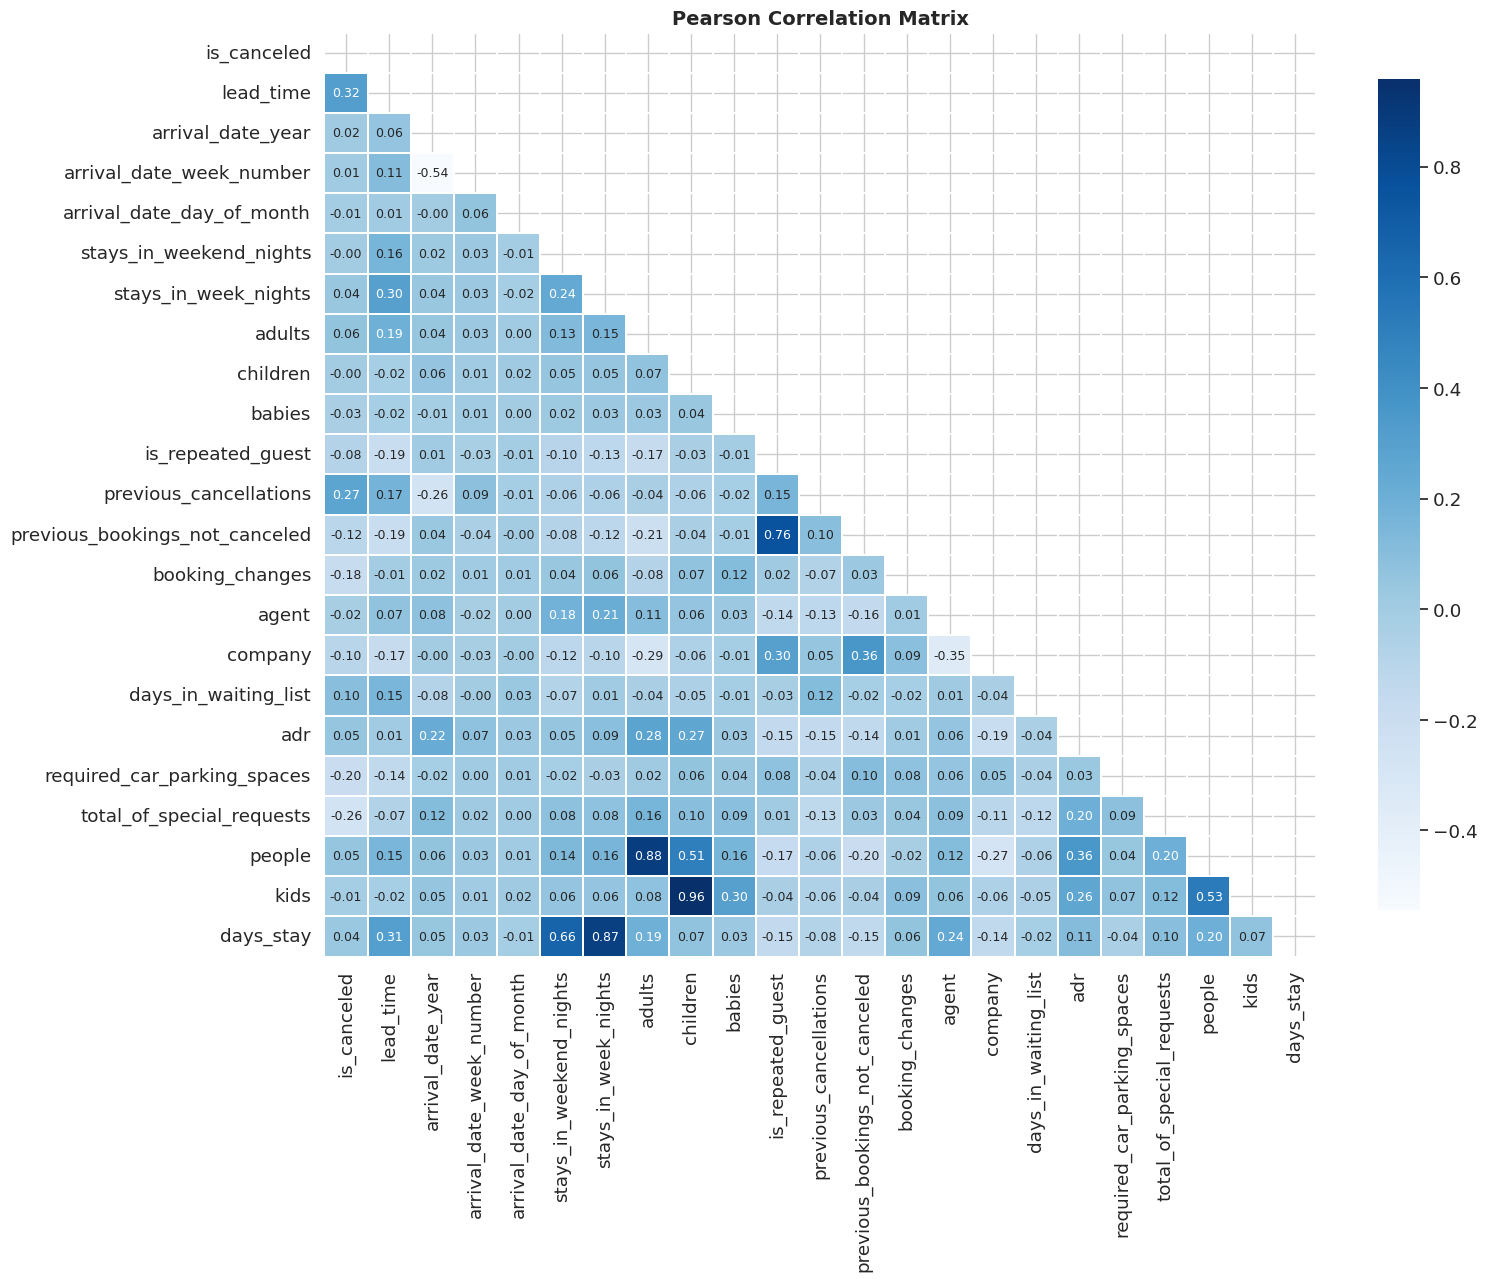

In [68]:
mask = np.zeros_like(data.corr(), dtype=bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))

plt.title('Pearson Correlation Matrix',fontsize=14, fontweight='bold')

sns.heatmap(data.corr(method='spearman'), linewidths=0.25,fmt=".2f", cmap="Blues", linecolor='w',annot=True,annot_kws={"size":9},mask=mask,cbar_kws={"shrink": .9});

In [ ]:
# #colors = px.colors.qualitative.Plotly[:len(monthly_cancelations['hotel'].unique())]

# fig = go.Figure()
# for hotel in monthly_cancelations['hotel'].unique():
#     fig.add_trace(go.Bar(x=monthly_cancelations[monthly_cancelations['hotel'] == hotel]['arrival_date_month'],
#                          y=monthly_cancelations[monthly_cancelations['hotel'] == hotel]['reservations'],
#                          name=hotel,
#                          text=monthly_cancelations[monthly_cancelations['hotel'] == hotel]['is_canceled']*100,
#                          textposition='outside',
#                          hovertemplate='<b>Hotel:</b> ' + hotel + 
#                                        '<br><b>Mês:</b> %{x}' +
#                                        '<br><b>Reservas:</b> %{y}' +
#                                        '<br><b>Cancelado:</b> %{text}',
#                         marker=dict(color=['#AF4343', '#C6AA97'])
#                         ))
    
# # Personalizar o layout do gráfico
# fig.update_layout(
#     title='Reservas por Mês e Hotel',
#     xaxis_title='Mês',
#     yaxis_title='is_canceled'
# )

# # Mostrar o gráfico
# fig.show()

## <div style="color:white;display:fill;border-radius:5px;background-color:#153656;letter-spacing:0.5px;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Insights</p></div>

- O adr médio do Resort Hotel é inferior ao City Hotel, exceto na alta temporada. O que até certo ponto é contra intuítivo.
- Não há registro de cancelamento de reserva quando solicitado de vagas de estacionamento.
- Lead Time elevado não é sinonimo de cancelamento. No Resort Hotel não é tão incomum reservas agendadas a mais de um ano não serem canceladas.
- Taxa de cancelamentos memos entre as agencias mais utilizadas podem variar bastante.
- Taxa de cancelamento entre as principais agencias podem variar bastante. Seria necessário mais dados/informações para investigar os motivos.
- A Taxa de cancelamento no City Hotel é 14% maior que no Resort Hotel.